# Simulations of the semi-discrete prey-predator models

In [3]:
#Dependancies
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## 1. Model without interaction

### 1.1 Only continuous model

In [4]:
#Definition of the continuous model
def cont_model(
    x0y0: list,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
) -> list:
    
    '''This model is a continuous model that describes the evolution of a pest population x and a predator population y 
    
    Param:
        x0y0: a list of initial values [x0, y0]
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        
    Return:
        xy: a list of the two population size of x and y'''
    
    #Initialisation
    x = x0y0[0]
    y = x0y0[1]

    #Equations of the derivative of x and y
    dx = r*x * (1 - x/K) - a*x*(c + x) * y
    dy = gamma * a*x*(c + x) * y - m*y

    return dx, dy

In [13]:
#Simulations

##Initialisation
x0y0 = [2, 1]

##Time points
t = np.linspace(0,20,1000)


In [14]:
#Solve ODE
cont_xy = odeint(cont_model, x0y0, t)

The warning above might be due to the fact that it is not semi-discrete. The models behavior may be impacted to the fact that there is no discrete part. That is what we are going to check. But to remember, this part about the continuous model is just to be sure that everything works. We start with something simple befode something complicated.

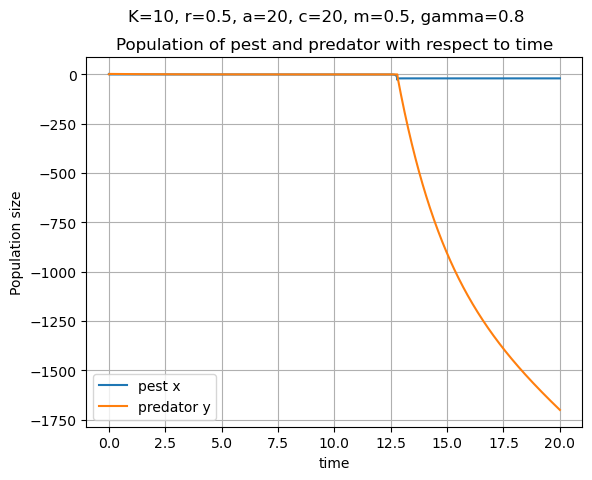

In [15]:
#Plot results
plt.plot(t, cont_xy.T[0], label = 'pest x')
plt.plot(t, cont_xy.T[1], label = 'predator y')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8')
plt.legend()
plt.grid()
plt.show()

Indeed, the behaviour of the graph is strange, reaching high absolute values, even negative. But we were prepared from strange behaviour because there is no discrete part. Now, we can focus on adding a discrete part.

In [18]:
#Just to see the content of the result of an odeint
x1y1 = odeint(cont_model, x0y0, [0,1])
print(x1y1)

[[2.00000000e+00 1.00000000e+00]
 [1.24062211e-11 1.57766723e+00]]


The first element of x1y1 is x0y0.  
The second element is the solution (x,y) at (1,1).

### 1.2 Semi-discrete model

In [30]:
#Definition of the semi-discrete model
def sd_model(
    x0y0: list,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
) -> list:
    
    '''This model is a continuous model that describes the evolution of a pest population x and a predator population y 
    
    Param:
        x0y0: a list of initial values [x0, y0]
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        
    Return:
        xy: a list of the two population size of x and y'''
    
    #Initialisation
    x = x0y0[0]
    y = x0y0[1]

    #Continuous part of the model
    dx = r*x * (1 - x/K) - a*x*(c + x) * y
    dy = gamma * a*x*(c + x) * y - m*y

    return dx, dy

#Definition of the parameters of the discrete part mu and T
    ##mu: release rate
    ##T: release period ###We impose T to be an integer in order to make the modulo work
mu = 1
T = 5

#Initial condition
##Definition of y0 as the "equilibrium"
m=0.5
y0 = mu*T/(1 - np.exp(-m*T))
x0y0 = [0, y0]

#Time points
t = np.linspace(0,20,201)

#Store solution in arrays
x = np.empty_like(t)
y = np.empty_like(t)

#Record initial conditions
x[0] = x0y0[0]
y[0] = x0y0[1]





release period at 0.0
release period at 5.0
release period at 10.0
release period at 15.0


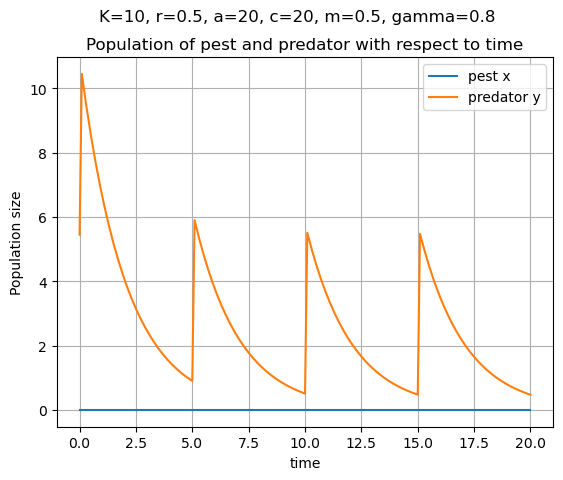

In [31]:
#Solve ODE
##we solve the ode point by point and change the equation to the discrete if t is a multiple of T
##It means that we use the value of a point to get the value of the next
for i in range(1,len(t)):
    #Span for next time step
    tspan = [t[i-1],t[i]] 
    #Solve for next step
    xy = odeint(sd_model,x0y0,tspan)
    x[i] = xy[1][0] #store the value of x
    if t[i-1] % T == 0:
        print('release period at', t[i-1])
        y[i] = y[i-1] + mu*T #store the value of y if t is a multiple of T
    else:
        y[i] = xy[1][1] #store the value of y if t is not a multiple of T
    #next initial condition
    x0y0 = [x[i],y[i]]


    
#Plot results
plt.plot(t, x, label = 'pest x')
plt.plot(t, y, label = 'predator y')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8')
plt.legend()
plt.grid()
plt.show()